# Term Project (1) - Orbit of the Sun

**023426910029  胡旭凡        2023.11.26**

## (a) The Sun's orbit properties


$\Omega_g=A-B=27.2\ km/s/kpc$\
$\kappa=\sqrt{(-4B\Omega_g)}=37\ km/s/kpc$

设相位角为$\phi$\
半径：$R_g+A_x\cos\phi=X$ (1)\
径向速度：$-\kappa A_x\sin\phi=U_\odot$ (2)\
切向速度：$\dot{y}+\Omega_gR_g=V_{LSR}+V_\odot \Rightarrow -2\Omega_gA_x\cos\phi+\Omega_gR_g=V_{LSR}+V_\odot$ (3)

求解得：$R_g=8.56\ kpc\ \phi=3.83=220$° $A_x=0.47\ kpc$\
所以近日点为 $R_{peri}=R_g-A_x=8.09\ kpc$ ，远日点为 $R_{apo}=R_g+A_x=9.03\ kpc$

## (b)Solar orbit integration

首先计算势能的梯度

此处应有图片！

源代码由C实现，见附录

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
d=np.loadtxt('pot.txt')
d.shape

(1001, 8)

In [20]:
H=0.5*(np.power(d[:,4],2)+np.power(d[:,5],2)+np.power(d[:,6],2))+d[:,7]

C:\Users\Pluto\AppData\Local\Temp\ipykernel_6440\1641486377.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(d[:,0],np.log10(np.abs(H/H[0]-1)))


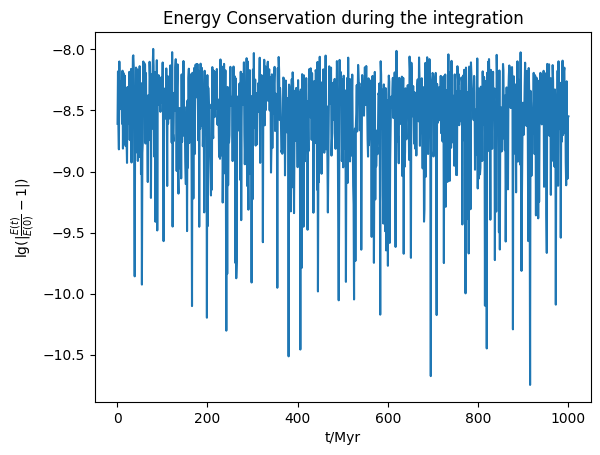

In [21]:
plt.plot(d[:,0],np.log10(np.abs(H/H[0]-1)))
plt.ylim()
plt.xlabel('t/Myr')
plt.ylabel(r'$\lg(|\frac{E(t)}{E(0)}-1|)$')
plt.title('Energy Conservation during the integration')
plt.show()

能量波动控制在了$10^{-8}$之内

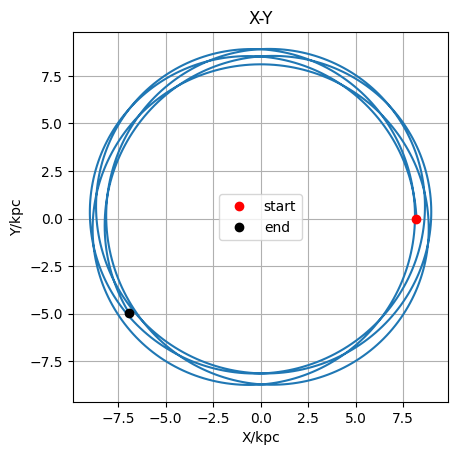

In [94]:
plt.plot(d[:,1],d[:,2])
plt.plot(d[0,1],d[0,2],'ro',label='start')
plt.plot(d[-1,1],d[-1,2],'ko',label='end')
plt.axis('scaled')
plt.title('X-Y')
plt.grid()
plt.xlabel('X/kpc')
plt.ylabel('Y/kpc')
plt.legend()

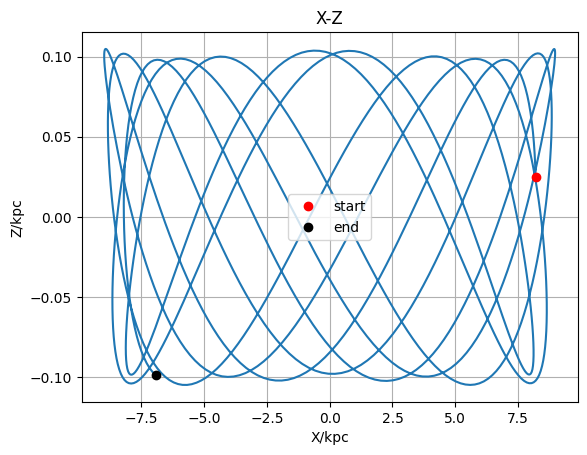

In [4]:
plt.plot(d[:,1],d[:,3])
plt.plot(d[0,1],d[0,3],'ro',label='start')
plt.plot(d[-1,1],d[-1,3],'ko',label='end')
#plt.axis('scaled')
plt.title('X-Z')
plt.grid()
plt.xlabel('X/kpc')
plt.ylabel('Z/kpc')
plt.legend()

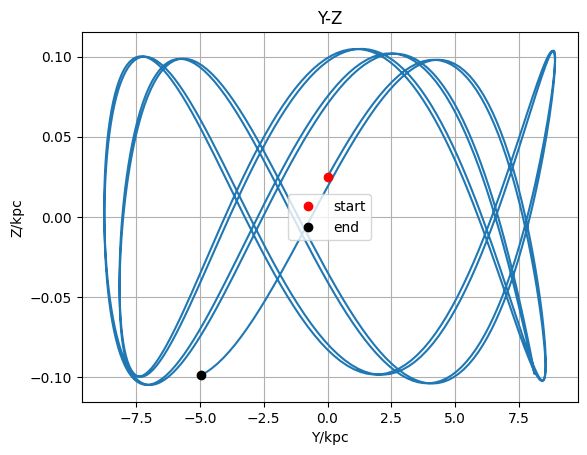

In [5]:
plt.plot(d[:,2],d[:,3])
plt.plot(d[0,2],d[0,3],'ro',label='start')
plt.plot(d[-1,2],d[-1,3],'ko',label='end')
#plt.axis('scaled')
plt.title('Y-Z')
plt.grid()
plt.xlabel('Y/kpc')
plt.ylabel('Z/kpc')
plt.legend()

In [3]:
def f(t,A,omega,phi,C):
    return A*np.sin(omega*t+phi)+C

In [7]:
#拟合 R 的变化
r=np.sqrt(np.power(d[:,1],2)+np.power(d[:,2],2))
a0 = 0.47
a1 = 0.037
a2 = 0
a3 = np.mean(r)
p0 = [a0, a1, a2, a3]
para,cov=curve_fit(f,d[:,0], r, p0=p0)
print(para,np.sqrt(np.diagonal(cov)))

[ 0.46870985  0.03968105 -2.16532523  8.59091903] [3.54208574e-04 2.69977753e-06 1.56300984e-03 2.52874741e-04]


$\kappa=39.7\pm2.7\times10^{-3}\ km/s/kpc$ $A_x=0.469\pm3.54\times10^{-4}\ kpc$  $r_g=8.59\ kpc$

近心点 8.12 kpc  远心点 9.06 kpc

In [39]:
#拟合z方向振动
para,_=curve_fit(f,d[:,0],d[:,3],p0=[0.1,0.072,0,0])
para

array([ 0.10124885,  0.07314377,  0.33980469, -0.00039523])

$\nu=73.1\ km/s/kpc$

In [43]:
#拟合近似X的振动
para,_=curve_fit(f,d[:,0],d[:,1],p0=[8.5,0.028,np.pi/2,0])
para

array([8.59696521, 0.02871472, 1.64533089, 0.00913519])

$\Omega_g=28.7\ km/s/kpc$

结果总结如下

|             | $\Omega_g[km/s/kpc]$ | $\kappa[km/s/kpc]$ | $\nu[km/s/kpc]$ | $r_{per}/kpc$ | $r_{apo}$ |
| ----------- | -------------------- | ------------------ | --------------- | ------------- | --------- |
| Integration  | 28.7                 | 39.7               | 73.1            | 8.12          | 9.06      |
| Calculation | 27.2                 | 37                 | -               | 8.09          | 9.03      |
| Textbook    | 28.6                 | 37                 | 70              | -             | -         |

可以发现，积分结果略微比计算和课本值偏大

## (c) $Z-v_z$ phase space

$E=\frac{J_z^2}{2r^2}+\frac{v_r^2+v_z^2}{2}+\Phi(r,z)$\
在近日（远日）点，$v_r=0$。由于 $\kappa/\nu$ 通常不为有理数，所以$|\Delta z|$ 没有确定值，我们可以取 $v_z=0$ 估算上限：
$E=\frac{J_z^2}{2r^2}+\frac{v_r^2+v_z^2}{2}+\Phi(r,z)\approx\frac{J_z^2}{2r^2}+\Phi(r,0)+\frac{1}{2}\Phi_{zz}(r,0)z^2\Rightarrow z=\sqrt{\frac{2(E-J_z^2/(2r^2)-\Phi(r,0))}{\Phi_{zz}(r,0)}}$

In [52]:
H[0]

-1594.5241855

通过Mathematica计算得知，（此处应有图片）

$|\Delta z|_{per}=0.108\ kpc ,|\Delta z|_{apo}=0.0867\ kpc$

## (d) $Z-v_z$ phase space

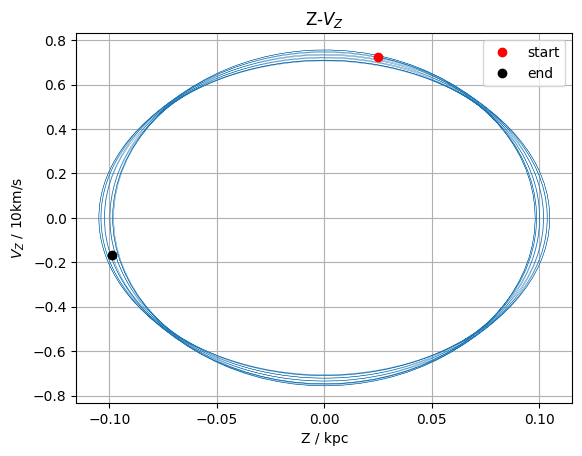

In [59]:
plt.plot(d[:,3],d[:,6],lw=0.3)
plt.plot(d[0,3],d[0,6],'ro',label='start')
plt.plot(d[-1,3],d[-1,6],'ko',label='end')
#plt.axis('scaled')
plt.title(r'Z-$V_Z$')
plt.grid()
plt.xlabel('Z / kpc')
plt.ylabel(r'$V_Z$ / 10km/s')
plt.legend()

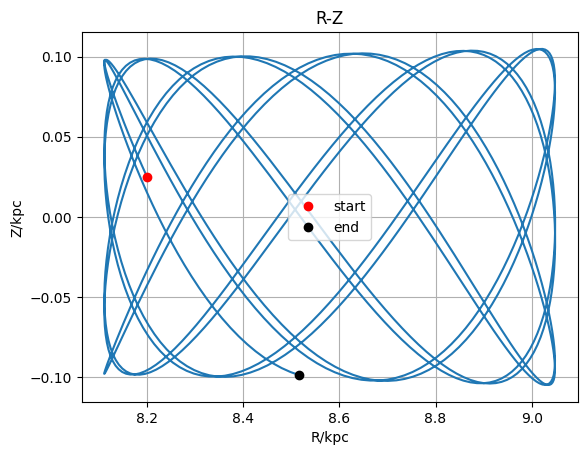

In [61]:
r=np.sqrt(np.power(d[:,1],2)+np.power(d[:,2],2))
plt.plot(r,d[:,3])
plt.plot(r[0],d[0,3],'ro',label='start')
plt.plot(r[-1],d[-1,3],'ko',label='end')
#plt.axis('scaled')
plt.title(r'R-Z')
plt.grid()
plt.xlabel('R/kpc')
plt.ylabel(r'Z/kpc')
plt.legend()

从图中可以看出，$|\Delta z|_{per},|\Delta z|_{apo}$ 与计算值接近。

## （e）rotational bar

In [63]:
d2=np.loadtxt('pot2.txt')
d2.shape

(1000, 8)

In [65]:
Hj=0.5*(np.power(d[:,4],2)+np.power(d[:,5],2)+np.power(d[:,6],2))+d[:,7]-40*(d[:,1]*d[:,5]-d[:,2]*d[:,4])

C:\Users\Pluto\AppData\Local\Temp\ipykernel_6440\3372188292.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(d[:,0],np.log10(np.abs(Hj/Hj[0]-1)))


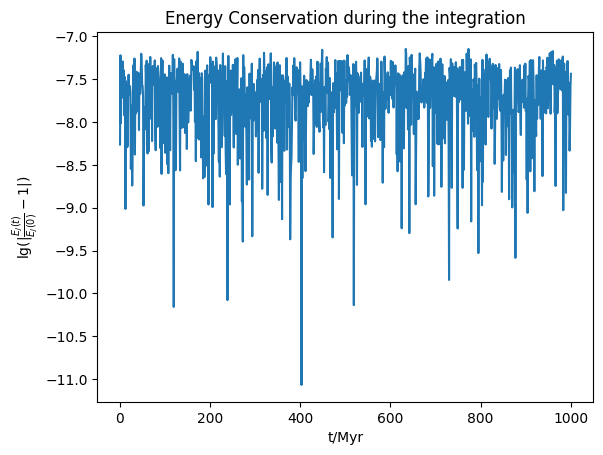

In [69]:
plt.plot(d[:,0],np.log10(np.abs(Hj/Hj[0]-1)))
plt.ylim()
plt.xlabel('t/Myr')
plt.ylabel(r'$\lg(|\frac{E_J(t)}{E_J(0)}-1|)$')
plt.title('Energy Conservation during the integration')
plt.show()

能量波动控制在了$10^{-7}$之内

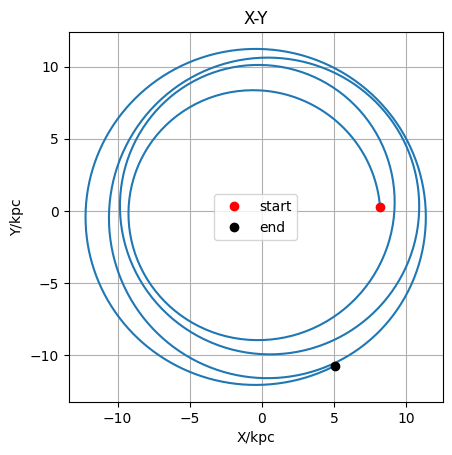

In [70]:
plt.plot(d2[:,1],d2[:,2])
plt.plot(d2[0,1],d2[0,2],'ro',label='start')
plt.plot(d2[-1,1],d2[-1,2],'ko',label='end')
plt.axis('scaled')
plt.title('X-Y')
plt.grid()
plt.xlabel('X/kpc')
plt.ylabel('Y/kpc')
plt.legend()

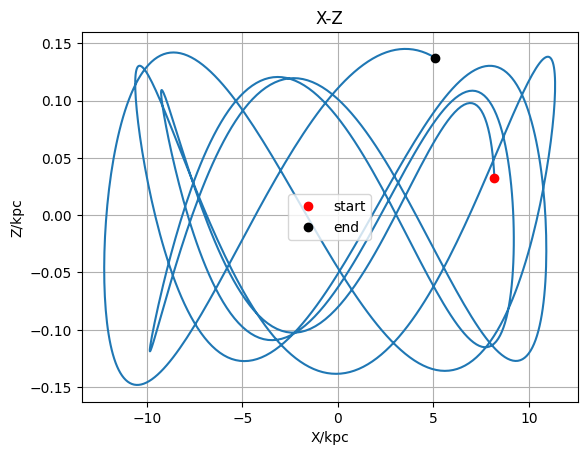

In [71]:
plt.plot(d2[:,1],d2[:,3])
plt.plot(d2[0,1],d2[0,3],'ro',label='start')
plt.plot(d2[-1,1],d2[-1,3],'ko',label='end')
#plt.axis('scaled')
plt.title('X-Z')
plt.grid()
plt.xlabel('X/kpc')
plt.ylabel('Z/kpc')
plt.legend()

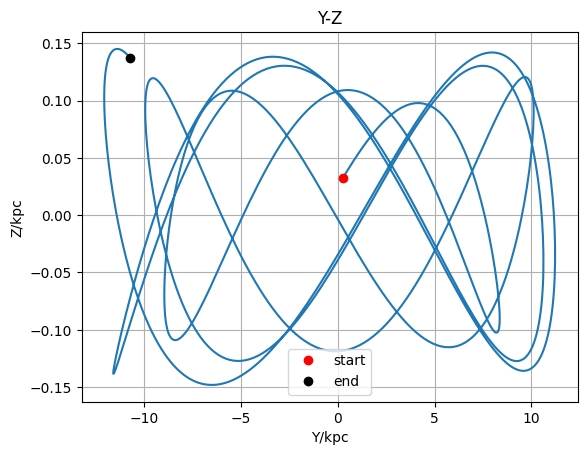

In [72]:
plt.plot(d2[:,2],d2[:,3])
plt.plot(d2[0,2],d2[0,3],'ro',label='start')
plt.plot(d2[-1,2],d2[-1,3],'ko',label='end')
#plt.axis('scaled')
plt.title('Y-Z')
plt.grid()
plt.xlabel('Y/kpc')
plt.ylabel('Z/kpc')
plt.legend()

此时的轨迹是原本的变种，振动幅度增加，同时轨迹变得更加没有规律。